<a href="https://colab.research.google.com/github/amlannag6/AndroidMalicious_ML_Model_Deployment-/blob/main/predModel_Dynamic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing
import torch
from sklearn import svm
from sklearn import tree
import pandas as pd
#from sklearn.externals import joblib
import pickle
import numpy as np
import seaborn as sns

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
#from tensorflow.keras.losses import sparse_categorical_crossentropy
#from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import brier_score_loss
from sklearn.metrics import roc_auc_score

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

In [6]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/amlannag6/AndroidMalicious_ML_Model_Deployment-/main/Prepared_DataSets/Dataset100_labled_fullTest.csv')


In [7]:
data.fillna(0)

,package_name,SEND_SMS,READ_PHONE_STATE,GET_ACCOUNTS,RECEIVE_SMS,READ_SMS,USE_CREDENTIALS,MANAGE_ACCOUNTS,WRITE_SMS,READ_SYNC_SETTINGS,...,defineClass,android.intent.action.PACKAGE_RESTARTED,android.intent.action.CALL_BUTTON,findClass,intent.action.RUN,android.intent.action.SET_WALLPAPER,Runtime.loadLibrary,android.intent.action.BATTERY_LOW,android.intent.action.ACTION_POWER_CONNECTED,Class
0,com.fungqyy.apk,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,NetLoop_VPN_5.0.4_apk-dl.com.apk,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"md.obsidian_1.1.0-38_minAPI21_arm64-v8a,armeab...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3168.apk,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,braga-store.apk,0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,com.prasesfee.apk,1,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
95,VLC_for_Android_v3.4.3_apkpure.com.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,com.parental.control.v4.apk,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
97,fakeAV_75B8F9DBB1CD79B7FC074F7F499150CF_LabelR...,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
data.columns

Index(['package_name', 'SEND_SMS', 'READ_PHONE_STATE', 'GET_ACCOUNTS',
       'RECEIVE_SMS', 'READ_SMS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS',
       'WRITE_SMS', 'READ_SYNC_SETTINGS',
       ...
       'defineClass', 'android.intent.action.PACKAGE_RESTARTED',
       'android.intent.action.CALL_BUTTON', 'findClass', 'intent.action.RUN',
       'android.intent.action.SET_WALLPAPER', 'Runtime.loadLibrary',
       'android.intent.action.BATTERY_LOW',
       'android.intent.action.ACTION_POWER_CONNECTED', 'Class'],
      dtype='object', length=208)

In [9]:
data.columns

Index(['package_name', 'SEND_SMS', 'READ_PHONE_STATE', 'GET_ACCOUNTS',
       'RECEIVE_SMS', 'READ_SMS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS',
       'WRITE_SMS', 'READ_SYNC_SETTINGS',
       ...
       'defineClass', 'android.intent.action.PACKAGE_RESTARTED',
       'android.intent.action.CALL_BUTTON', 'findClass', 'intent.action.RUN',
       'android.intent.action.SET_WALLPAPER', 'Runtime.loadLibrary',
       'android.intent.action.BATTERY_LOW',
       'android.intent.action.ACTION_POWER_CONNECTED', 'Class'],
      dtype='object', length=208)

In [10]:
##encoding
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data['Class'])
data['Class'] = le.transform(data['Class'])
print(data['Class'])

0     1
1     0
2     0
3     1
4     0
     ..
94    1
95    0
96    1
97    1
98    0
Name: Class, Length: 99, dtype: int64


In [11]:
data.Class.value_counts()

1    62
0    37
Name: Class, dtype: int64

In [12]:
data.isna().sum()

package_name                                    0
SEND_SMS                                        0
READ_PHONE_STATE                                0
GET_ACCOUNTS                                    0
RECEIVE_SMS                                     0
                                               ..
android.intent.action.SET_WALLPAPER             0
Runtime.loadLibrary                             0
android.intent.action.BATTERY_LOW               0
android.intent.action.ACTION_POWER_CONNECTED    0
Class                                           0
Length: 208, dtype: int64

In [13]:
data.describe()

,SEND_SMS,READ_PHONE_STATE,GET_ACCOUNTS,RECEIVE_SMS,READ_SMS,USE_CREDENTIALS,MANAGE_ACCOUNTS,WRITE_SMS,READ_SYNC_SETTINGS,AUTHENTICATE_ACCOUNTS,...,defineClass,android.intent.action.PACKAGE_RESTARTED,android.intent.action.CALL_BUTTON,findClass,intent.action.RUN,android.intent.action.SET_WALLPAPER,Runtime.loadLibrary,android.intent.action.BATTERY_LOW,android.intent.action.ACTION_POWER_CONNECTED,Class
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.000000
mean,0.242424,0.494949,0.242424,0.353535,0.292929,0.181818,0.161616,0.222222,0.161616,0.161616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.626263
std,0.430730,0.502519,0.430730,0.480500,0.457422,0.387657,0.369972,0.417855,0.369972,0.369972,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.486257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [ ]:
sns.pairplot(data , diag_kind = 'kde');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


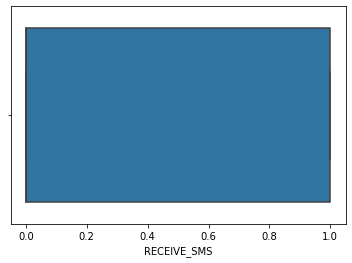

In [14]:
sns.boxplot(data.RECEIVE_SMS)

In [15]:
data.loc[data.RECEIVE_SMS > 0].shape[0]

35